In [1]:
import numpy as np #for numerical operation
import pandas as pd #for data analysis and manipulation
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for data visualization 

In [2]:
df=pd.read_csv(r"Zomato data .csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [3]:
print(df)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

#search for any missing values


#convert the datatype of column - rate

In [8]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)

df['rate']=df['rate'].apply(handleRate)
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [4]:
df.info() #checking availability of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


------------------------------------------------------------------
1.what type of restaurant do the majority of customers order from
------------------------------------------------------------------

In [9]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


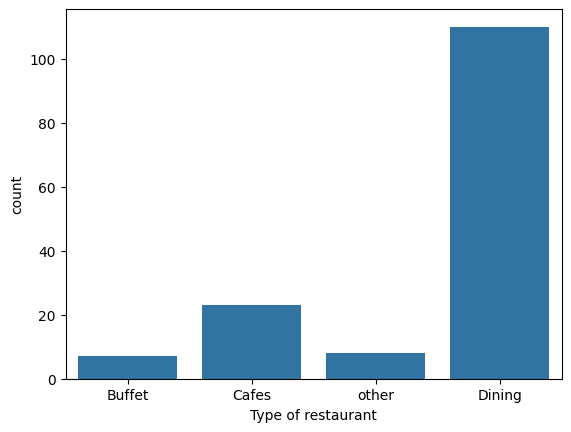

In [6]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of restaurant")
plt.show()

#conclusion: majority of the restaurants falls in dining category

------------------------------------------------------------------
2.How many votes has each type of restaurants received from customers
------------------------------------------------------------------

Text(0, 0.5, 'Votes')

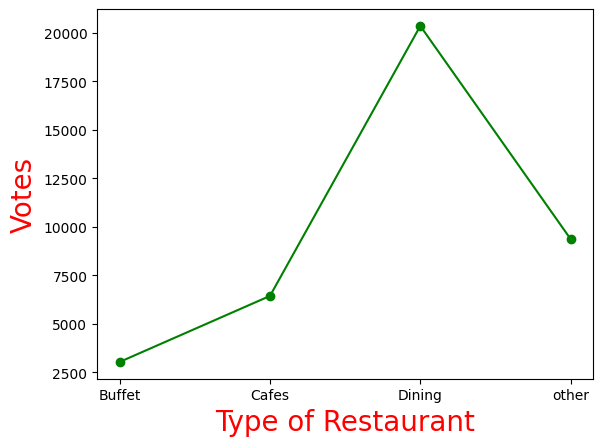

In [7]:
grouped_data=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,color='green',marker='o')
plt.xlabel('Type of Restaurant',color='red',size=20)
plt.ylabel('Votes',color='red',size=20)

#conclusion:dining restaurants has achieved most number of votes

-------------------------------------------------------------------------------------------
3.What are the ratings that the majority of restaurants have received 
-------------------------------------------------------------------------------------------

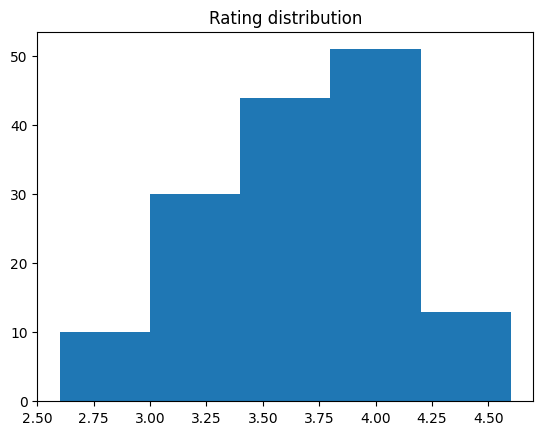

In [11]:
plt.hist(df['rate'],bins=5) #bins represents the number of bars in the graph
plt.title("Rating distribution")
plt.show()

#conclusion:the majority of restaurants received ratings from 3.5 to 4

-------------------------------------------------------------------------------------------
4.Zomato has observed that most couples order most of their food online. What is their average spending on each order?
-------------------------------------------------------------------------------------------

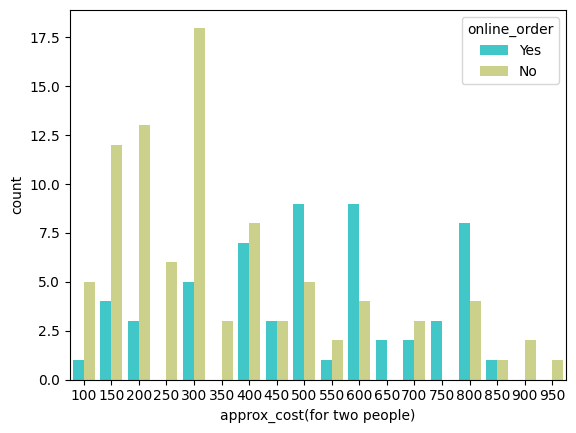

In [22]:
sns.countplot(x='approx_cost(for two people)',data=df,hue='online_order',palette='rainbow')
plt.show()

#conclusion:the majority couples who order foods online are of rs 500 and 600 

------------------------------------------------------------
5.Which mode(online/offline) has received the maximum rating?
-----

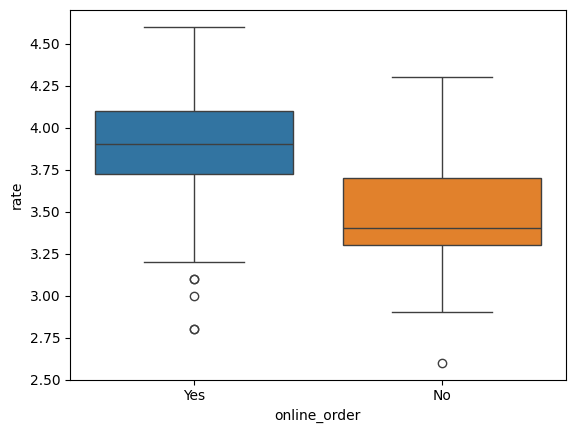

<Figure size 1000x1000 with 0 Axes>

In [24]:
sns.boxplot(data=df,x='online_order',y='rate',hue='online_order')
plt.figure(figsize=(10,10))
plt.show()

#conclusion: offline orders receive lower rating in comparison to online order. Also online order has got more nuber of ratings than offline orders

---
6.Which type of restaurants received more offline orders ,so that zomato can provide customers with some good offers
--

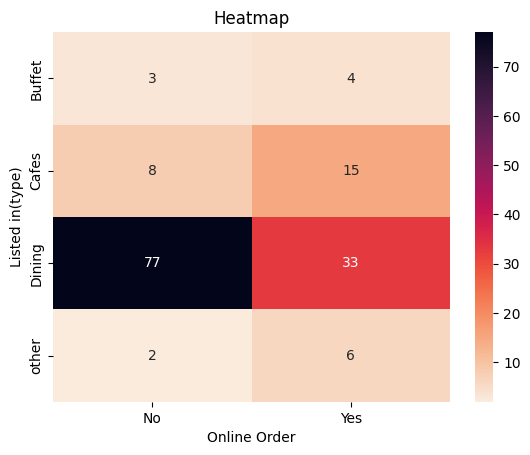

In [33]:
table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size')
sns.heatmap(table,annot=True,cmap='rocket_r',fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed in(type)")
plt.show()

#conclusion: cafes,buffets and other types of restaurants are getting online orders more than offline orders,but dining restaurants are getting offline orders more than online orders